In [1]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, semilla=1):
        self.eta = eta
        self.n_iter = n_iter
        self.semilla = semilla
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.semilla)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errores_ = []
        
        for _ in range(self.n_iter):
            errores = 0
            for xi, target in zip(X, y):
                incremento = self.eta * (target - self.predict(xi))
                self.w_[1:] += incremento * xi
                self.w_[0] += incremento
                errores += int(incremento!= 0.0)
            self.errores_.append(errores)
        
        return self

    def net_input(self, X):
            return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
            return np.where(self.net_input(X) >= 0.0, 1, -1)
            
v1 = np.array([1, 2, 3 ])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

np.float64(0.0)

### PREGUNTA 1: ¿Porqué no inicializar los pesos de la neurona directamente todos a 0?
Porque el vector de pesos w representa una línea recta y si inicialmente es 0, cuando falla al
predecir y actualiza, al multiplicarlo, cambia su tamaño pero nunca su dirección.

In [2]:
## Paso 2: Cargar el dataset de la base de datos Iris
## Leeremos el dataset de la base de datos Iris

lugar = 'iris.data'
print('----Leyendo el dataset de:', lugar)
df = pd.read_csv(lugar, header=None, encoding='utf-8')
print('------ Ultimos 5 filas del dataset: \n', df.tail())



----Leyendo el dataset de: iris.data
------ Ultimos 5 filas del dataset: 
        0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


### PREGUNTA 2: ¿Para qué sirve el parámetro header del método read_csv()?
Se utiliza para especificar cuál fila del archivo CSV debe ser interpretada como el encabezado de las columnas. El encabezado es importante porque contiene los nombres de las columnas que serán utilizadas como etiquetas en el DataFrame.
En este caso al indicar header=None, Pandas asignará nombres genéricos a las columnas como 0, 1, 2, etc


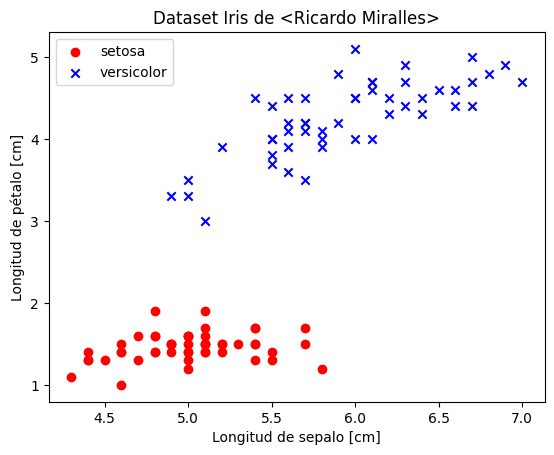

In [4]:
y = df.iloc[0:100,4].values #Seleccionamos ejemplos de setosa y versicolor
y = np.where(y == 'Iris-setosa', -1, 1) #Codificamos las etiquetas en +1 (Iris-veriscosa) y -1 (Iris-setosa)
X = df.iloc[0:100, [0,2]].values  # Extraemos características de longitud y ancho del pétalo

#Dibujamos los datos
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('Longitud de sepalo [cm]')   
plt.ylabel('Longitud de pétalo [cm]')

plt.legend(loc='upper left')
plt.title(loc='center', label='Dataset Iris de <Ricardo Miralles>')

plt.show()

### PREGUNTA 3: Pon tu nombre y primer apellido al título del gráfico tal y como te propone el código y entrega una captura del gráfico con el nombre u02_p01_03.png.

### PREGUNTA 4: Viendo como están distribuidas las flores del dataset y teniendo en cuenta que el perceptrón es un clasificador lineal, ¿debería ser capaz de encontrar una línea que separe perfectamente los dos tipos o clases de flores?
 Si deberia de ser capaz de encontrar una línea que separe perfectamente los dos tipos de flores ya que estan perfectamente divididas en la distribución del dataset 

### Traza una línea que separe ambas clases usando un programa de edición de imágenes y la entregas como u02_p01_04.png.¿Puedes decirme qué linea es?  Darme aproximadamente su ecuación.
La linea que separe ambas clases es una recta, y su ecuacion es y = mx + b, donde m es la pendiente y b es la intersección con el eje y.

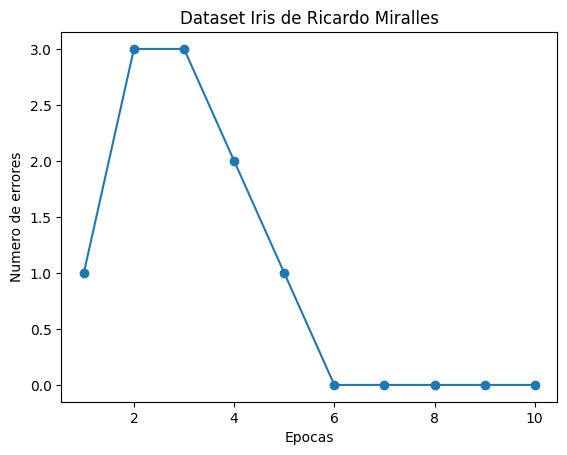

In [15]:
## Paso 3: Entrenar el perceptrón con el dataset Iris
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errores_) + 1), ppn.errores_, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Numero de errores')
plt.title(loc='center', label='Dataset Iris de Ricardo Miralles')
plt.show()

### PREGUNTA 5: Pon tu nombre y primer apellido al título del gráfico tal y como te propone el código y entrega una captura del gráfico con el nombre U02_P01_05.png.

### PREGUNTA 6: ¿Sería cierto decir que durante el entrenamiento en la época 2 y 3 es cuando comete más errores el modelo?
Si es cierto que durante el entrenamiento en la época 2 y 3 es cuando comete más errores el modelo ya que en estas épocas la red neuronal esta empezando a aprender.
#### Marca la época en que comienza a converger el modelo?  
La epoca en que comienza a converger el modelo es en la epoca 4.

#### Si bajas el learning rate a 0.01 (el parámetro eta) ¿El modelo converge?
Más lentamente.
(Con un learning rate más bajo, los ajustes a los pesos son menores en cada iteración, lo que ralentiza el proceso de convergencia. El modelo aún puede converger, pero necesitará más épocas.)
#### Marca la afirmación correcta sobre este gráfico que acabamos de generar:
Sirve para vigilar durante el entrenamiento la cantidad de errores que va cometiendo.

#### Al acabar de entrenar la cantidad de errores que comete es 0. ¿Significa que tenemos un modelo perfecto?
No. Necesitamos saber como se comporta con datos que no ha usado para entrenar

C:\Users\ESP\AppData\Local\Temp\ipykernel_15204\4203664815.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y=X[y == cl, 1],


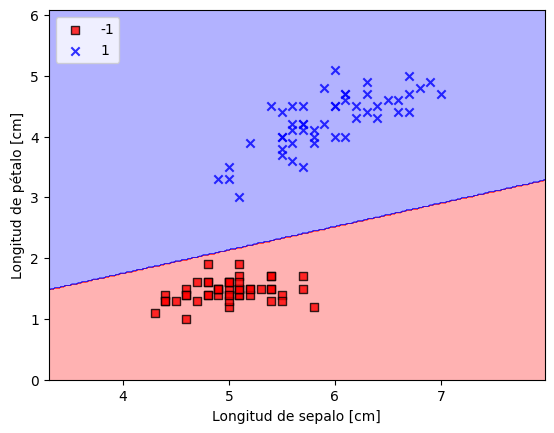

In [17]:
## Paso 4: Funcion para dibujar regiones de decisión
def plot_regiones(X, y, clasificador, resoluciones=0.02):
    marcadores = ('s','x','o','^','v')
    colores = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colores[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resoluciones),
                         np.arange(x2_min, x2_max, resoluciones))
    
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colores[idx],
                    marker=marcadores[idx], label=cl, edgecolor='black')
        
#Función para mostrar la línea de decisión
plot_regiones(X, y, clasificador=ppn)
plt.xlabel('Longitud de sepalo [cm]')
plt.ylabel('Longitud de pétalo [cm]')
plt.legend(loc='upper left')

plt.show()


### PREGUNTA 7: Pon tu nombre y primer apellido al título del gráfico y entrega una captura del gráfico con el nombre u02_p01_07.png.